In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
url = "https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv"
df = pd.read_csv(url)

In [30]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9215,2023-09-12,93.58
9216,2023-09-13,93.04
9217,2023-09-14,95.20
9218,2023-09-15,95.55


In [31]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df.set_index('Date', inplace=True)


In [34]:
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
             Price
count  9220.000000
mean     49.175491
std      32.872921
min       9.100000
25%      19.180000
50%      41.000000
75%      72.162500
max     143.950000


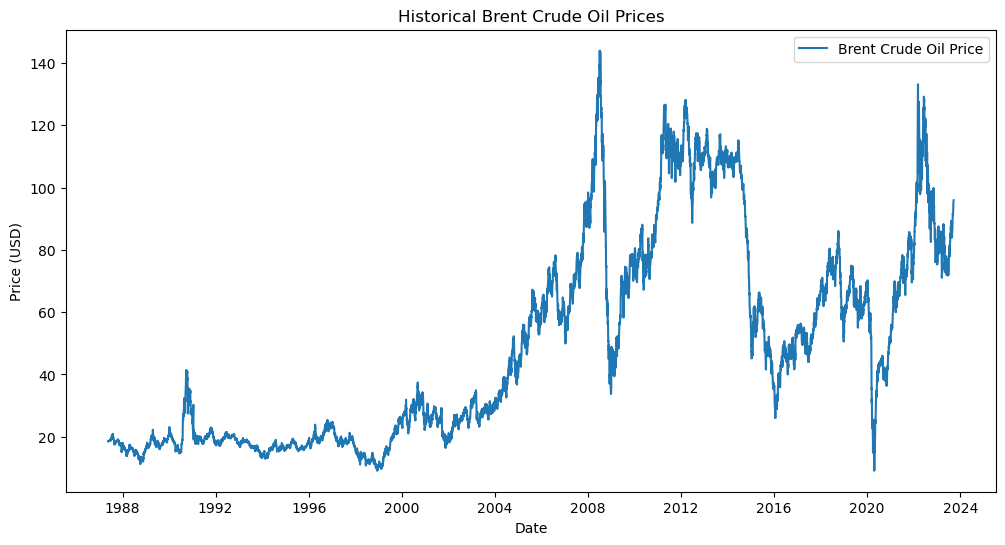

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Brent Crude Oil Price')
plt.title('Historical Brent Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

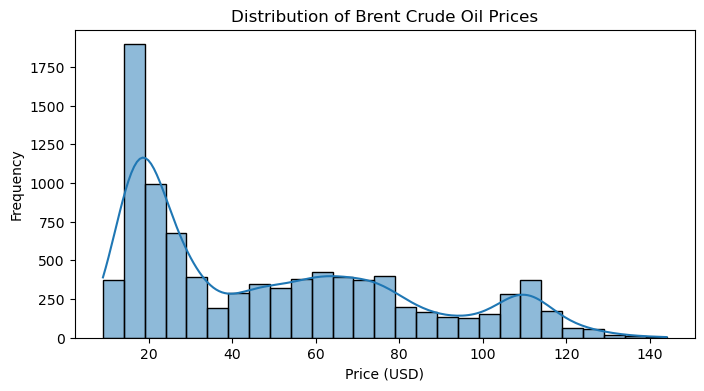

In [36]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Brent Crude Oil Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [37]:
df['Price_Lag1'] = df['Price'].shift(1)
df['Price_Lag2'] = df['Price'].shift(2)

In [38]:
df.dropna(inplace=True)

In [56]:
X = df[['Price_Lag1', 'Price_Lag2']]
y = df['Price']
df

,Price,Price_Lag1,Price_Lag2,Moving_Avg_30,Month,Year,Daily_Return,Cumulative_Return
Date,,,,,,,,
1987-05-22,18.55,18.45,18.63,NaN,5,1987,NaN,NaN
1987-05-25,18.60,18.55,18.45,NaN,5,1987,0.269542,1.002695
1987-05-26,18.63,18.60,18.55,NaN,5,1987,0.161290,1.004313
1987-05-27,18.60,18.63,18.60,NaN,5,1987,-0.161031,1.002695
1987-05-28,18.60,18.60,18.63,NaN,5,1987,0.000000,1.002695
...,...,...,...,...,...,...,...,...
2023-09-12,93.58,91.97,91.85,87.575000,9,2023,1.750571,5.044744
2023-09-13,93.04,93.58,91.97,87.831667,9,2023,-0.577046,5.015633
2023-09-14,95.20,93.04,93.58,88.204667,9,2023,2.321582,5.132075


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
print(y_pred)

[ 45.14199481  16.09273624 108.95760975 ...  60.23323798  56.82036416
  67.59280893]


In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.4582883787677818
R^2 Score: 0.99866036483203


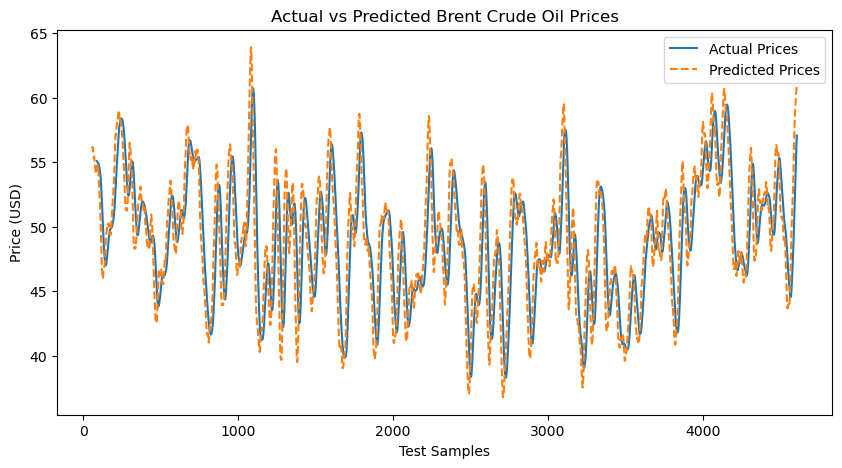

In [79]:
y_test = pd.DataFrame(y_test).rolling(window=30).mean()
y_pred = pd.DataFrame(y_pred).rolling(window=30).mean()
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Brent Crude Oil Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

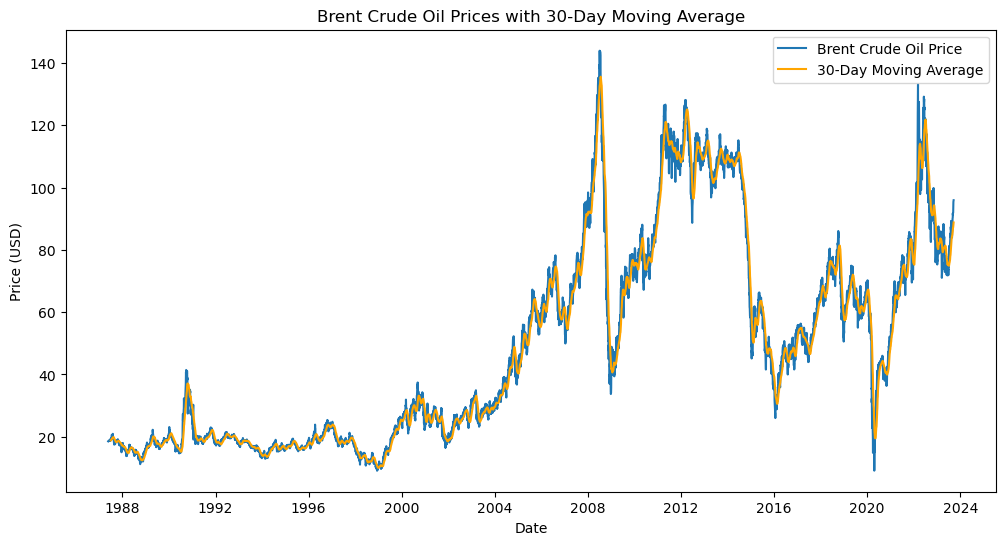

In [46]:
# Moving Average Plot
df['Moving_Avg_30'] = df['Price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Brent Crude Oil Price')
plt.plot(df.index, df['Moving_Avg_30'], label='30-Day Moving Average', color='orange')
plt.title('Brent Crude Oil Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

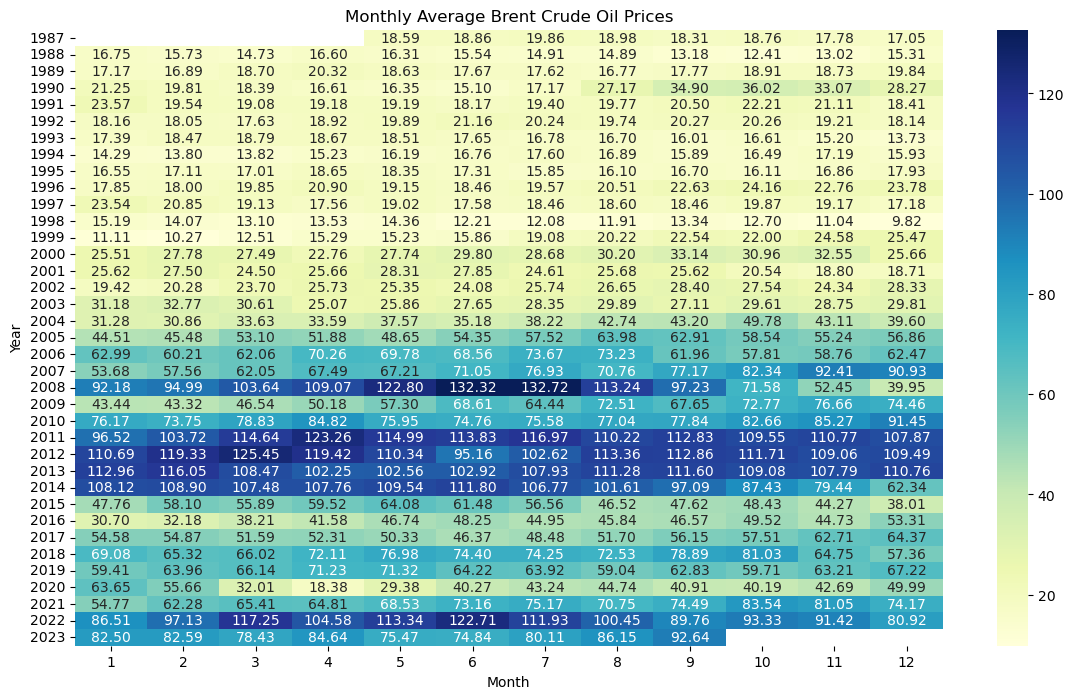

In [47]:
# Monthly Average Prices
df['Month'] = df.index.month
df['Year'] = df.index.year

monthly_avg = df.groupby(['Year', 'Month'])['Price'].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_avg, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Monthly Average Brent Crude Oil Prices')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


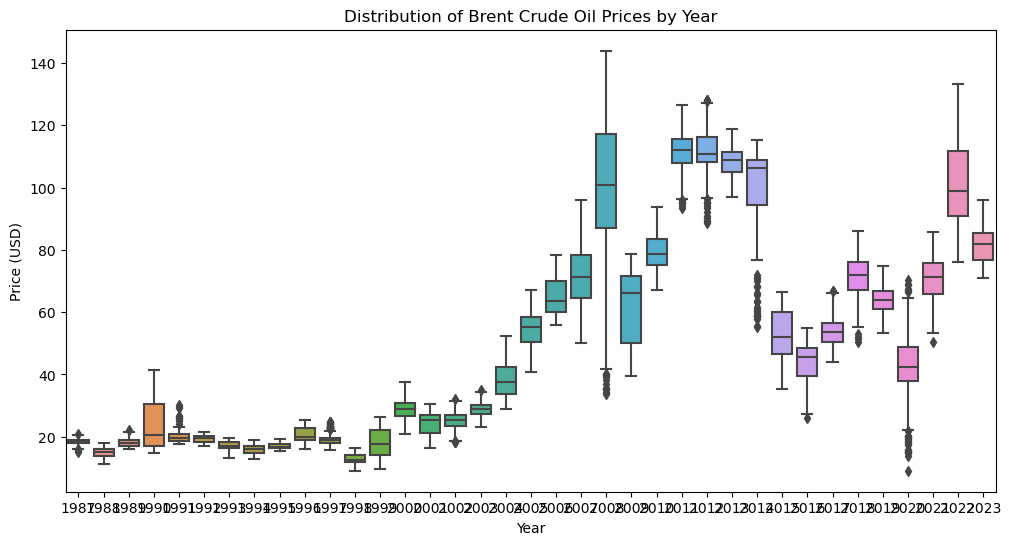

In [48]:
# Price Distribution by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Year'], y=df['Price'])
plt.title('Distribution of Brent Crude Oil Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()


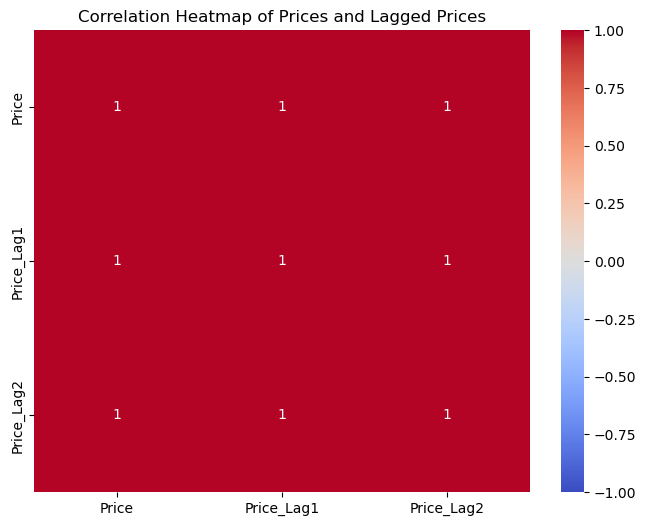

In [49]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Price_Lag1', 'Price_Lag2']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Prices and Lagged Prices')
plt.show()


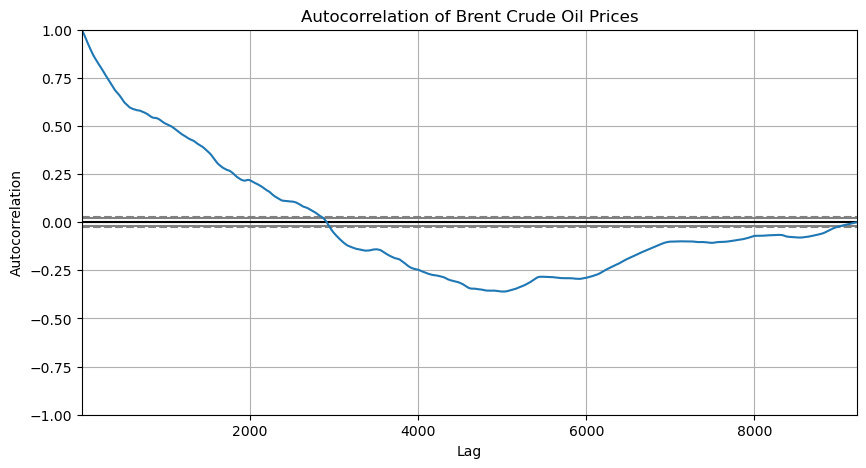

In [50]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Price'])
plt.title('Autocorrelation of Brent Crude Oil Prices')
plt.show()


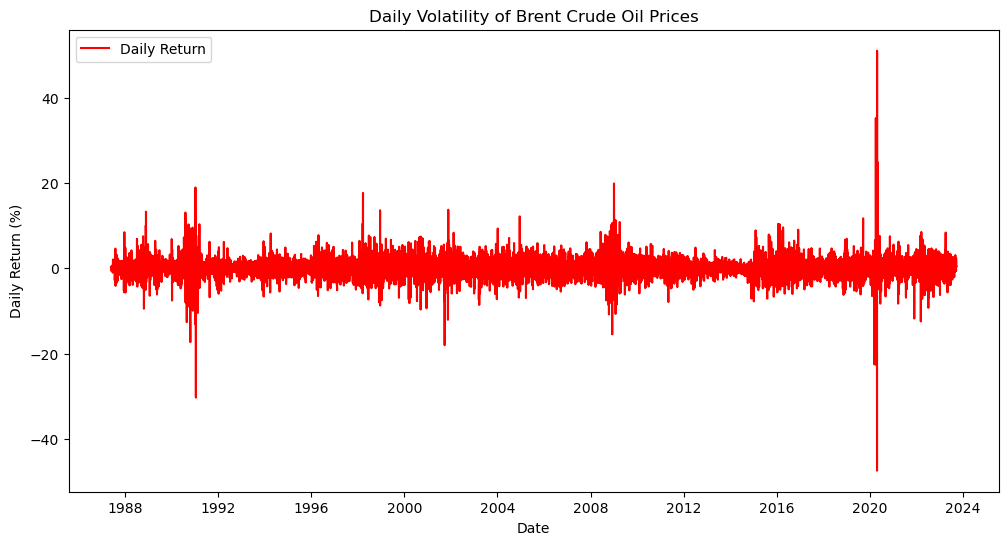

In [51]:
# Volatility Calculation and Plot
df['Daily_Return'] = df['Price'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'], label='Daily Return', color='red')
plt.title('Daily Volatility of Brent Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()


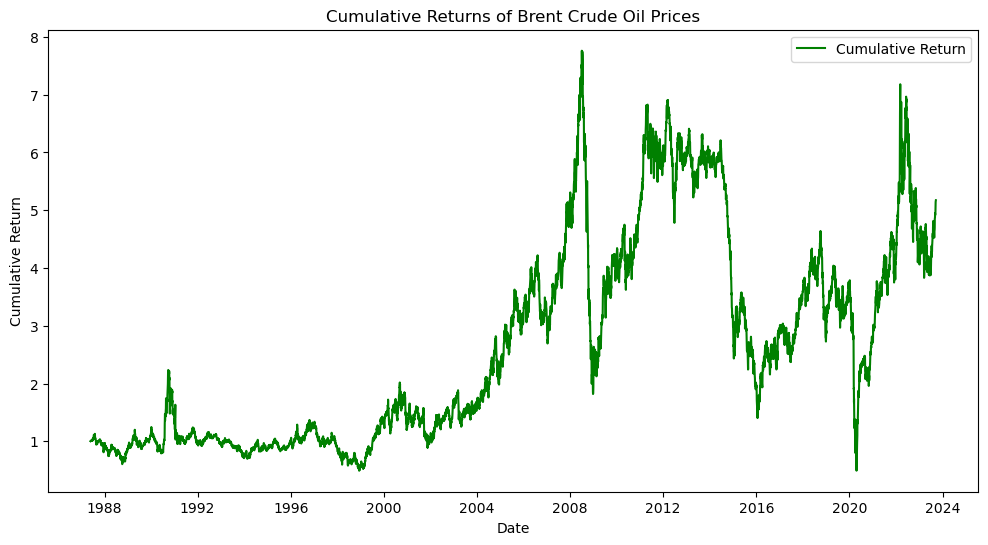

In [52]:
# Cumulative Returns
df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Returns of Brent Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


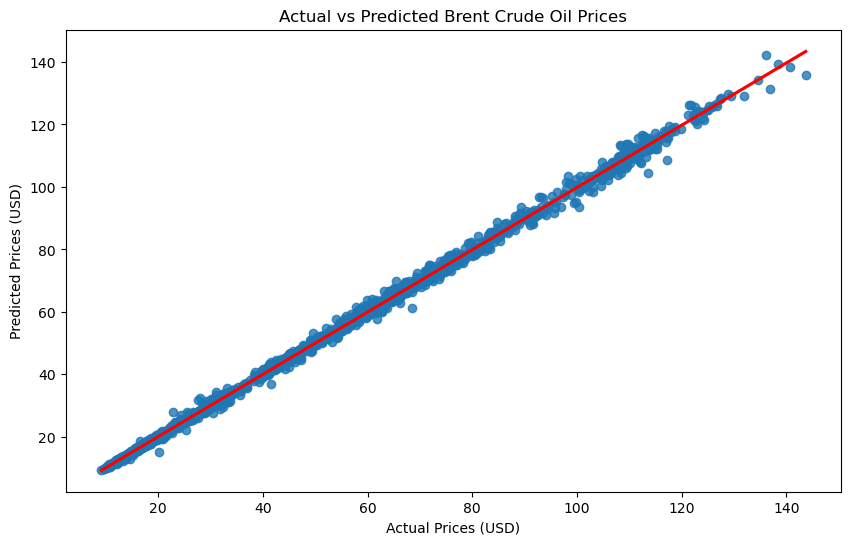

In [53]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title('Actual vs Predicted Brent Crude Oil Prices')
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.show()


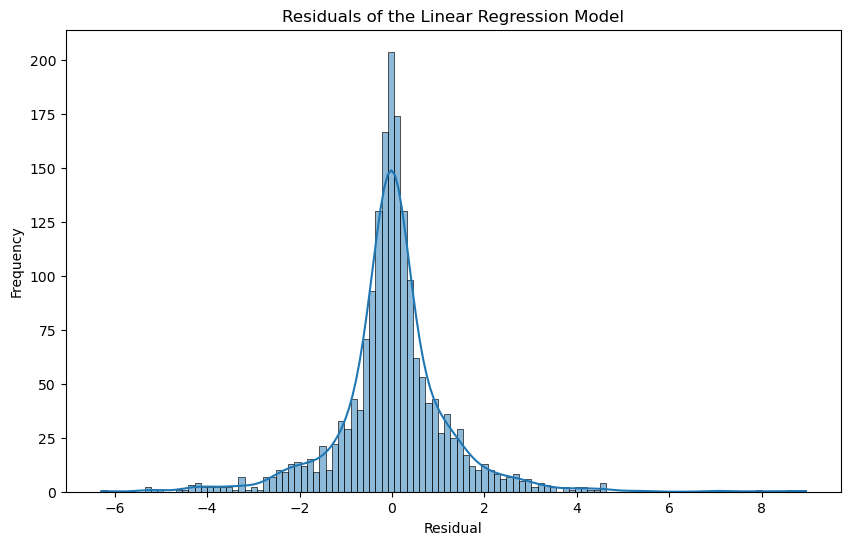

In [54]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [55]:
Summary
Moving Average Plot: Smooths the data to show trends over time.
Monthly Average Prices: Highlights any seasonal trends.
Price Distribution by Year: Shows how prices vary within each year.
Correlation Heatmap: Displays correlations between variables.
Autocorrelation Plot: Analyzes the correlation of the series with itself over different lags.
Pair Plot: Visualizes relationships between features.
Volatility Plot: Shows daily price fluctuations.
Cumulative Returns: Tracks the overall performance.
Scatter Plot with Regression Line: Evaluates the model's predictions.
Residual Plot: Analyzes the distribution of prediction errors.

SyntaxError: invalid syntax (637145160.py, line 2)